# MSc in Business Analytics 
### Vretteas Stylianos - p2822003

# Exploring Scotch Whiskies

In a paper that appeared in 1996, [Pierre Legendre](http://numericalecology.com/) and [F.-J. Lapointe](http://bio.umontreal.ca/repertoire-departement/vue/lapointe-francois-joseph/) performed a classification of pure malt whiskeys. You can find the paper online at http://adn.biol.umontreal.ca/~numericalecology/reprints/Appl%20Stat%2043,%201994.pdf and also some details at http://adn.biol.umontreal.ca/~numericalecology/data/scotch.html.

---

> Panos Louridas, Associate Professor <br />
> Department of Management Science and Technology <br />
> Athens University of Economics and Business <br />
> louridas@aueb.gr

In [1]:
# packages 
import pandas as pd
import numpy as np

# matplotlib
import matplotlib.pyplot as plt
% matplotlib inline

In C:\Users\svret\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\svret\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\svret\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\svret\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\svret\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

In [2]:
# load the dataset 

data = pd.read_excel('scotch.xlsx', header=1)
data.head(5)

C:\Users\svret\Anaconda3\lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")
C:\Users\svret\Anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:296: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,NAME,Unnamed: 1,wyne,yellow,v.pale,pale,p.gold,gold,o.gold,f.gold,...,DISTRICT,islay,midland,spey,east,west,north,lowland,campbell,islands
0,Aberfeldy,Aberfeldy,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,MIDLAND,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Aberlour,Aberlour,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,SPEY,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Ardberg,Ardberg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,SOUTH,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Ardmore,Ardmore,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,SPEY,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Auchentoshan,Auchentosh,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,WEST,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [3]:
# drop columnn ' Unnamed: 1 '

data = data.drop(columns=['Unnamed: 1'])

In [4]:
# check for NAs 
data.isna().sum()

NAME        2
wyne        1
yellow      1
v.pale      1
pale        1
           ..
west        1
north       1
lowland     1
campbell    1
islands     1
Length: 84, dtype: int64

In [5]:
# drop NAs 
data = data.dropna()

In [6]:
# check column names 
data.columns

Index(['NAME', 'wyne', 'yellow', 'v.pale', 'pale', 'p.gold', 'gold', 'o.gold',
       'f.gold', 'bronze', 'p.amber', 'amber', 'f.amber', 'red', 'sherry',
       'AROMA', 'PEAT', 'SWEET', 'LIGHT', 'FRESH', 'DRY', 'FRUIT', 'GRASS',
       'SEA', 'SHERRY', 'SPICY', 'RICH', 'soft', 'med', 'full', 'round',
       'smooth', 'light', 'firm', 'oily', 'full.1', 'dry', 'sherry.1', 'big',
       'light.1', 'smooth.1', 'clean', 'fruit', 'grass', 'smoke', 'sweet',
       'spice', 'oil', 'salt', 'arome', 'full.2', 'dry.1', 'warm', 'big.1',
       'light.2', 'smooth.2', 'clean.1', 'fruit.1', 'grass.1', 'smoke.1',
       'sweet.1', 'spice.1', 'oil.1', 'salt.1', 'arome.1', 'ling', 'long',
       'very', 'quick', 'AGE', 'DIST', 'SCORE', '%', 'REGION', 'DISTRICT',
       'islay', 'midland', 'spey', 'east', 'west', 'north ', 'lowland',
       'campbell', 'islands'],
      dtype='object')

In [7]:
# convert to UPPERCASE letters and rename the % 
data.columns = map(str.upper, data.columns)
data.rename(columns={'%' : 'PERCENTAGE'}, inplace=True)
data.columns

Index(['NAME', 'WYNE', 'YELLOW', 'V.PALE', 'PALE', 'P.GOLD', 'GOLD', 'O.GOLD',
       'F.GOLD', 'BRONZE', 'P.AMBER', 'AMBER', 'F.AMBER', 'RED', 'SHERRY',
       'AROMA', 'PEAT', 'SWEET', 'LIGHT', 'FRESH', 'DRY', 'FRUIT', 'GRASS',
       'SEA', 'SHERRY', 'SPICY', 'RICH', 'SOFT', 'MED', 'FULL', 'ROUND',
       'SMOOTH', 'LIGHT', 'FIRM', 'OILY', 'FULL.1', 'DRY', 'SHERRY.1', 'BIG',
       'LIGHT.1', 'SMOOTH.1', 'CLEAN', 'FRUIT', 'GRASS', 'SMOKE', 'SWEET',
       'SPICE', 'OIL', 'SALT', 'AROME', 'FULL.2', 'DRY.1', 'WARM', 'BIG.1',
       'LIGHT.2', 'SMOOTH.2', 'CLEAN.1', 'FRUIT.1', 'GRASS.1', 'SMOKE.1',
       'SWEET.1', 'SPICE.1', 'OIL.1', 'SALT.1', 'AROME.1', 'LING', 'LONG',
       'VERY', 'QUICK', 'AGE', 'DIST', 'SCORE', 'PERCENTAGE', 'REGION',
       'DISTRICT', 'ISLAY', 'MIDLAND', 'SPEY', 'EAST', 'WEST', 'NORTH ',
       'LOWLAND', 'CAMPBELL', 'ISLANDS'],
      dtype='object')

In [8]:
# check data types 
data.dtypes

NAME         object
WYNE        float64
YELLOW      float64
V.PALE      float64
PALE        float64
             ...   
WEST        float64
NORTH       float64
LOWLAND     float64
CAMPBELL    float64
ISLANDS     float64
Length: 84, dtype: object

### Q1 Score Prediction

Try to find a model to predict the score of schotch a whiskey based on the attributes collected by the authors. 
You can use any algorithm provided by scikit-learn. Evaluate how well your model performs.

In [9]:
# Q1 packages

import sklearn 
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, accuracy_score

### Prepare data for model 
First of all we are going to prepare our data for the first question. The dataset name will be data1 for the first question.  Also we are going to define our y dependent variable and its predictors x's. 
I drop columns REGION and DISTRICT and I keep the encoded ones. In this step i set the whiskey name of each observation as index for better understanding and for feauture visualization purposes. Last but not least we plot a histogram for the depended variable score, from the histogram we understand that the majority of the whiskeys are between 70-75 SCORE value.

In [10]:
# create data1 drop REGION & DISTRICT columns (keep only the encoded ones)
data1 = data.copy()
data1 = data1.drop(columns=['REGION','DISTRICT'])

In [11]:
# set name of each whiskey as index 
data1 = data1.set_index('NAME')
data1.head(3)

,WYNE,YELLOW,V.PALE,PALE,P.GOLD,GOLD,O.GOLD,F.GOLD,BRONZE,P.AMBER,...,PERCENTAGE,ISLAY,MIDLAND,SPEY,EAST,WEST,NORTH,LOWLAND,CAMPBELL,ISLANDS
NAME,,,,,,,,,,,,,,,,,,,,,
Aberfeldy,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,40.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Aberlour,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,43.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Ardberg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,40.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:>

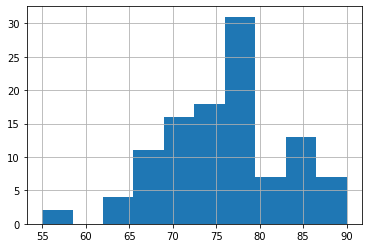

In [12]:
# check some histograms 
data1['SCORE'].hist()

Most of the whiskeys thirty-three (33) have 76 and 75 value SCORE, eight (8) of them has 85 value SCORE, below the detailed SCORES 

In [13]:
# get details for SCORE variable
data1['SCORE'].value_counts() #

76.0    20
75.0    13
85.0     8
71.0     7
77.0     6
69.0     5
67.0     5
79.0     4
90.0     4
81.0     4
68.0     3
83.0     3
64.0     3
73.0     3
66.0     3
80.0     3
72.0     2
70.0     2
74.0     2
86.0     2
55.0     1
65.0     1
78.0     1
57.0     1
88.0     1
87.0     1
89.0     1
Name: SCORE, dtype: int64

In [14]:
# describe SCORE
data1['SCORE'].describe()

count    109.000000
mean      75.587156
std        6.947170
min       55.000000
25%       71.000000
50%       76.000000
75%       79.000000
max       90.000000
Name: SCORE, dtype: float64

In [15]:
# dimensions 
data1.head(5)
data1.shape

(109, 81)

### Define y and x 
Now we are going to define our y and x.  
Since we try to predict SCORE values based on the other attributes, y will be our dependent variable and the rest variables of the dataset will serve as predictors. 

In [16]:
# Our dependent variable y is SCORE - define y 

y = data1['SCORE']
y.head(5)

NAME
Aberfeldy       69.0
Aberlour        83.0
Ardberg         85.0
Ardmore         66.0
Auchentoshan    85.0
Name: SCORE, dtype: float64

In [17]:
# The predictor variables are the rest - define x's
x = data1.loc[:, data1.columns != 'SCORE']
x.head(5)

,WYNE,YELLOW,V.PALE,PALE,P.GOLD,GOLD,O.GOLD,F.GOLD,BRONZE,P.AMBER,...,PERCENTAGE,ISLAY,MIDLAND,SPEY,EAST,WEST,NORTH,LOWLAND,CAMPBELL,ISLANDS
NAME,,,,,,,,,,,,,,,,,,,,,
Aberfeldy,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,40.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Aberlour,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,43.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Ardberg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,40.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ardmore,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,46.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Auchentoshan,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,40.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Split dataset into train and test 
Afterwards, we split our dataset into train and test. 
In the train set we are goind to train the model and in the test set we are going to see how well the model performs on unseen data. Take notice that the observations of the test set will not be part of the model trainning because we do not want our model to suffer from the overfitting problem. 
Overfitting occurs when a model is trained into the whole given dataset, with this approach the model has a view of all dataset and its acccuracy metric is biased. In our case, i choose a 80-20 split into train and test sets respectively. 

In [18]:
# split the dataset into train - test , 80-20 split 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [19]:
# function for mean square error
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, x_train, y_train, scoring="neg_mean_squared_error", cv = 10))
    return(rmse)

### Model building 
We want to build a model in order to predict the Score based on the observations we have. 
I choose to build a regression model because i believe it is most suitable for this kind of problem. 
There are three main types of Regression each of them have different approaches. Below are the brief details. 

- Ridge Regression, which penalizes sum of squared coefficients (L2 penalty).
- Lasso Regression, which penalizes the sum of absolute values of the coefficients (L1 penalty).
- Elastic Net, a convex combination of Ridge and Lasso.

The coefficients of the model are found via an optimization process that seeks to minimize the sum squared error between the predicted values and the expected target values (y).

I choose to implement Elastic Net which combines the Ridge and Lasso regressions.

This happens due to the  hyperparameter “alpha” which is provided to assign how much weight is given to each of the L1 and L2 penalties. Alpha is a value between 0 and 1 and is used to weight the contribution of the L1 penalty and one minus the alpha value is used to weight the L2 penalty.

I choose an alpha of 0.5 which  would provide a 50 percent contribution of each penalty to the loss function. 
An alpha value of 0 gives all weight to the L2 penalty and a value of 1 gives all weight to the L1 penalty.

In [20]:
# Elastic net model 

model_ElasticNet=ElasticNet(alpha=0.5)
model_ElasticNet.fit(x_train,y_train)

# Alpha, the constant that multiplies the L1/L2 term, 
# is the tuning parameter that decides how much we want to penalize the model. 
# The default value is 1.0.

ElasticNet(alpha=0.5, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [21]:
# R2 score - model explains the variation of the train dataset at 73.26 % 

score_Elastic = model_ElasticNet.score(x_train, y_train)
score_Elastic

0.7326352618338932

### Variable Selection - Shrinkage
The below variable coefficients  have not been shrinked into zero and are those selected by the Elastic Net model. 

In [22]:
# Putting together the intercept, coefficients and their corrsponding estimations 
model_ElasticNet_coef_ = pd.DataFrame()
model_ElasticNet_coef_["Variable"] = x_train.columns
model_ElasticNet_coef_['Coefficient Estimate'] = pd.Series(model_ElasticNet.coef_)
model_ElasticNet_coef_.iloc[0] = ['Intercept', model_ElasticNet.intercept_ ]
model_ElasticNet_coef_[model_ElasticNet_coef_['Coefficient Estimate']!=0]

,Variable,Coefficient Estimate
0,Intercept,61.228449
17,LIGHT,-0.152252
19,DRY,-0.352716
22,SEA,0.333486
25,RICH,0.449577
26,SOFT,-0.337953
31,LIGHT,-0.106400
32,FIRM,0.102231
35,DRY,-0.305570
50,DRY.1,-0.349593


In [23]:
# Model Evaluation - RMSE
rmse_ElasticNet = rmse_cv(model_ElasticNet).mean()
rmse_ElasticNet

3.521307708194403

### Prediction 
We are going to see how well the model behaves on unseen data. Now we are going to use the train dataset in order to predict values based on the model we built and then we are going to use some metrics to see its accuracy. Finally, we plot the actual values vs the predicted ones. The results are quite good. 

In [24]:
# Predict
y_pred = model_ElasticNet.predict(x_test)

In [25]:
# Mean squared error
mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0))

MSE:  16.102393798546288
RMSE:  8.051196899273144


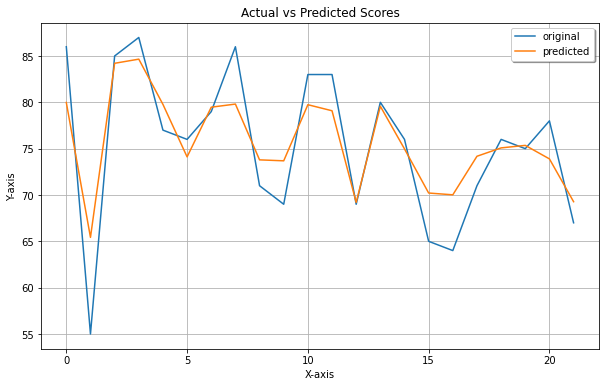

In [26]:
# Actual vs Fitted plot 
plt.rcParams["figure.figsize"] = (10,6)
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("Actual vs Predicted Scores")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

### Q2 PCA

Perform a PCA analysis on the data to reduce the number of dimensions.

In [27]:
# Q2 packages 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn import decomposition
import seaborn as sns; sns.set_style("whitegrid", {'axes.grid' : False})

from pca import pca
import seaborn as sns

C:\Users\svret\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Principal Component Analysis 


In [28]:
# create data2 for Question2 ( same with Q1 since all variables are numeric)
data2 = data1.copy() 

### Standardize  data
Before the implementation of the PCA method , we have to standardize our data in order to have equal variances. PCA is affected by feature scales, so we'll transform the data in order to have equal variances. This is important in PCA since it is a variance maximizing exercise. It projects your original data onto directions which maximize the variance.

In [29]:
# Standardize the data 
scaler = StandardScaler()
scaler.fit(data2)
data2_scaled = scaler.transform(data2)

In [30]:
data2.shape

(109, 81)

### Principal Component Analysis 
We are going to use PCA method in order to reduce the dimensionality of our dataset by selecting the most important features that capture maximum information about the dataset. These features are selected based on the variance they cause in the output. The feature that causes highest variance is the first principal component. The feature that is responsible for second highest variance is considered the second principal component, and so on. It is important to mention that principal components do not have any correlation with each other. 
First we fit PCA with 81 components and will visualize the results.

In [31]:
# fit PCA with all components 

pca_81 = PCA(n_components = 81)
results_81 = pca_81.fit_transform(data2_scaled)

### Optimal number of components 
From the plots we understand that in order to have 95% explained variance ratio, I have to fit the PCA method with 54 component. Our purpose is to reduce the dataset but try to keep 95% of information from the initial.

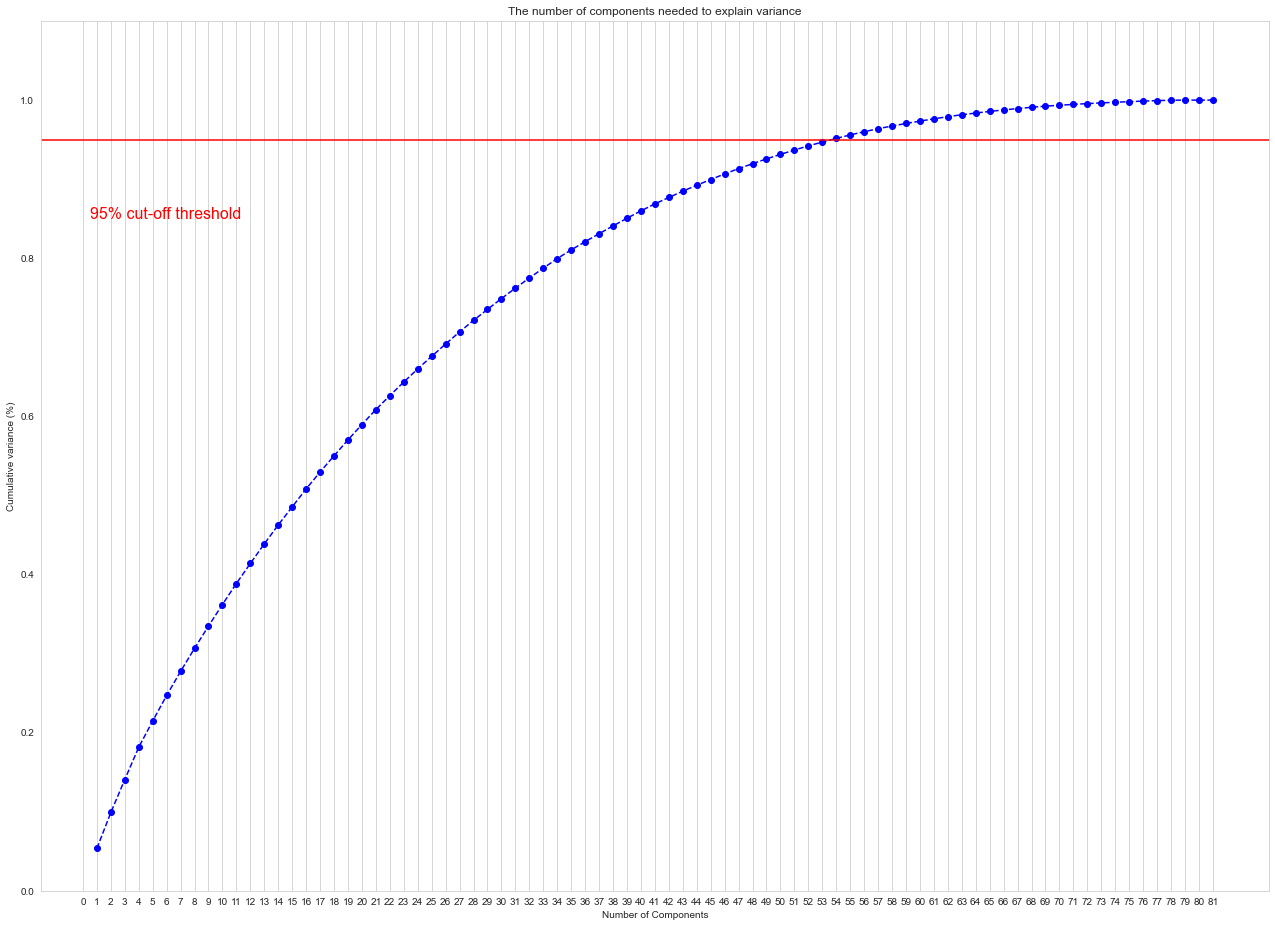

In [32]:
# plot 95% - number of components 54 

plt.rcParams["figure.figsize"] = (22,16)

fig, ax = plt.subplots()
xi = np.arange(1, 82, step=1)
y = np.cumsum(pca_81.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 82, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

### Reduce Dimensionality 

I would like to reduce the given dataset but try to keep the explained variance ratio at 95%, thus the reduced dataset will be much smaller than the original but will have only a loss of 5% only from the initial. 

In [33]:
#  We choose 54 components to get a reduced dataset with 95 % explained variance of the original 

# PCA
pca_54 = PCA(n_components=54)
results_54 = pca_54.fit_transform(data2_scaled)

In [34]:
# construct biplot function in order to visualize the  PCA loadings and loading in biplot in sklearn
# from lecture's notes

from math import ceil

# based on https://stackoverflow.com/questions/39216897/plot-pca-loadings-and-loading-in-biplot-in-sklearn-like-rs-autoplot

def biplot(score, coeff, text, labels=None):
    fig = plt.figure(figsize=(10, 8))
    ax1 = fig.add_subplot(111, label='pcas')
    ax2 = fig.add_subplot(111, label='loading vectors', frame_on=False)
    ax2.xaxis.tick_top()
    ax2.yaxis.tick_right()    
    xs = score[:, 0]
    ys = score[:, 1]
    n = coeff.shape[0]

    # draw scatterplot
    ax1.scatter(xs, ys, fc='k')
    for i, txt in enumerate(text):
        ax1.text(xs[i] + 0.05, ys[i], txt,
                    fontsize=12,
                    alpha=0.75,
                    c='blue')
        
    # draw loading vectors
    for i in range(n):
        ax2.arrow(0, 0, coeff[i,0] * 0.85, coeff[i,1] * 0.85, 
                  lw=1,
                  color = 'r',alpha = 0.5, head_width=0.025, head_length=0.025)
        if labels is None:
            ax2.text(coeff[i,0], coeff[i,1], "Var"+str(i+1), 
                     color = 'g', ha = 'center', va = 'center')
        else:
            ax2.text(coeff[i,0], coeff[i,1], 
                     labels[i], color = 'brown', ha = 'center', va = 'center',
                     fontsize=14)

    xmax = max(xs.min(), xs.max(), key=abs)
    xlim = 0.5 * ceil(2.0 * xmax)
    ax1.set_xlim(-xlim, xlim)
    ymax = max(ys.min(), ys.max(), key=abs)
    ylim = 0.5 * ceil(2.0 * ymax)
    ax1.set_ylim(-ylim, ylim)
    ax1.axhline(0, linestyle=':', color='k', lw=0.5) # horizontal lines
    ax1.axvline(0, linestyle=':', color='k', lw=0.5) # vertical lines
    ax1.set_xlabel("PC1")
    ax1.set_ylabel("PC2")
    ax2.set_xlim(-0.3, 0.3)
    ax2.set_ylim(-0.3, 0.3)

### Biplot explanation 

A PCA biplot shows both Principal Components scores of samples (dots) and loadings of variables (vectors). 
The further away these vectors are from a PC origin, the more influence they have on that PC.

Loading plots also hint at how variables correlate with one another: 
A small angle implies positive correlation, a large one suggests negative correlation, and a 90° angle indicates no     correlation between two characteristics. (eg. SPEY and SALT have negative correlation , while DIST and SALT have positive. 

For visual purposes i set the dimensions of the biplot at ( -0.3 , 0.3 ) scale in order to see better the vectors. 

<Figure size 1440x864 with 0 Axes>

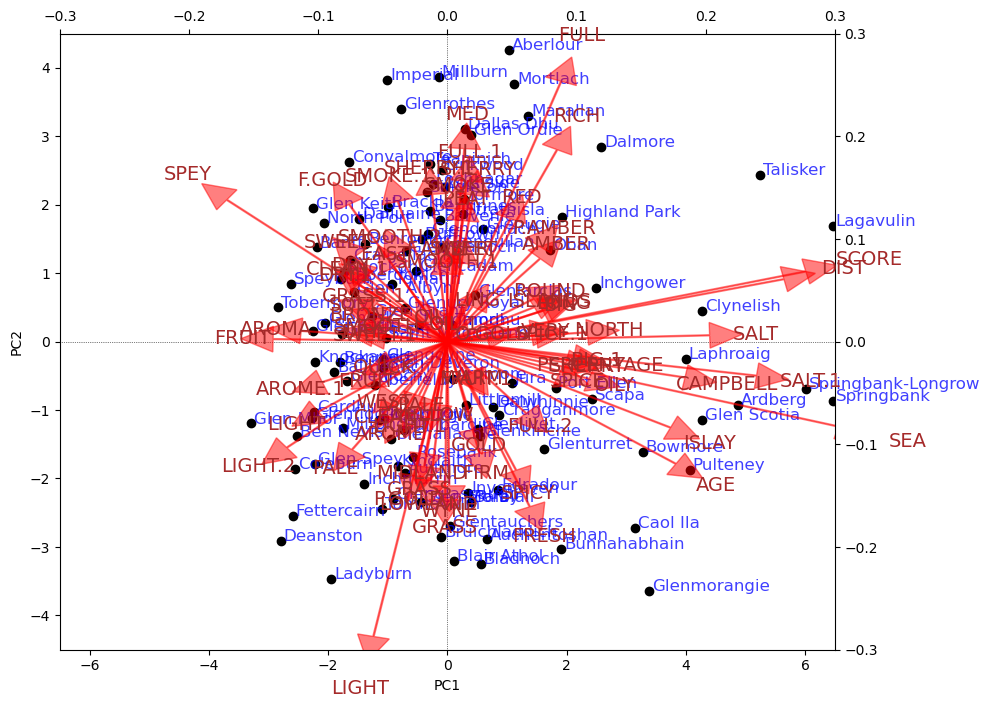

In [35]:
# biplot - 54 components 

plt.figure(figsize=(20,12))

plt.style.use('default')

biplot(results_54,
           pca_54.components_.T,
           data2.index,
           data2.columns)

In [36]:
# export the 54 components
pca_54.components_.T

array([[ 1.69616372e-03, -1.65427528e-01,  1.22220028e-01, ...,
         1.35578105e-01, -4.61620223e-02,  2.54329192e-02],
       [-1.03618630e-02, -7.19823660e-02,  1.44705389e-01, ...,
        -4.87732954e-02,  4.79014628e-02, -1.05161244e-01],
       [-2.59061990e-02, -6.20368231e-02, -1.12511099e-01, ...,
        -1.32909768e-01,  1.26414958e-04, -1.41421001e-02],
       ...,
       [-1.47496342e-02, -1.58989648e-01,  9.75548988e-02, ...,
        -7.38588093e-02, -2.21995316e-02,  5.23770143e-03],
       [ 2.16490119e-01, -4.12083463e-02, -5.05265743e-02, ...,
        -1.14934180e-01,  1.09055809e-01, -1.37297130e-01],
       [ 7.92211756e-02,  3.93953452e-02,  9.29432227e-02, ...,
         7.38033868e-02, -2.64742187e-02, -1.78858896e-01]])

In [37]:
# reduced dataset 
reduced = pd.DataFrame(pca_54.components_.T)
reduced.shape

(81, 54)

In [38]:
# PCA with 81 components Cumulative Explained variance is 1 
print(pca_81.explained_variance_)
print(pca_81.explained_variance_ratio_.sum())

[4.38033297e+00 3.71534736e+00 3.40269650e+00 3.34509618e+00
 2.71309687e+00 2.63576889e+00 2.49263727e+00 2.38518568e+00
 2.29669242e+00 2.23135017e+00 2.17125101e+00 2.07183628e+00
 2.02763993e+00 1.95495904e+00 1.86834964e+00 1.85860408e+00
 1.74462110e+00 1.67967177e+00 1.64638112e+00 1.58819243e+00
 1.54486836e+00 1.44860153e+00 1.39769575e+00 1.36211665e+00
 1.29650580e+00 1.27509636e+00 1.24944656e+00 1.19298496e+00
 1.13932112e+00 1.11101534e+00 1.08699604e+00 1.04093738e+00
 1.02112343e+00 9.88750636e-01 8.98352124e-01 8.45865215e-01
 8.28780964e-01 8.06885628e-01 7.88489031e-01 7.64529562e-01
 7.22817781e-01 6.63217344e-01 6.49523319e-01 6.14614404e-01
 5.89198319e-01 5.82055649e-01 5.47234790e-01 5.10800723e-01
 4.93357808e-01 4.66632229e-01 4.49626630e-01 4.31173135e-01
 3.89499883e-01 3.78646468e-01 3.64060624e-01 3.30247541e-01
 3.14004558e-01 2.72797500e-01 2.64167710e-01 2.45423238e-01
 2.37180602e-01 2.23699424e-01 1.98213092e-01 1.75795657e-01
 1.65487271e-01 1.578402

In [39]:
# PCA with 54 components Cumulative Explained variance is 95%  
print(pca_54.explained_variance_)
print(pca_54.explained_variance_ratio_.sum())

[4.38033297 3.71534736 3.4026965  3.34509618 2.71309687 2.63576889
 2.49263727 2.38518568 2.29669242 2.23135017 2.17125101 2.07183628
 2.02763993 1.95495904 1.86834964 1.85860408 1.7446211  1.67967177
 1.64638112 1.58819243 1.54486836 1.44860153 1.39769575 1.36211665
 1.2965058  1.27509636 1.24944656 1.19298496 1.13932112 1.11101534
 1.08699604 1.04093738 1.02112343 0.98875064 0.89835212 0.84586522
 0.82878096 0.80688563 0.78848903 0.76452956 0.72281778 0.66321734
 0.64952332 0.6146144  0.58919832 0.58205565 0.54723479 0.51080072
 0.49335781 0.46663223 0.44962663 0.43117314 0.38949988 0.37864647]
0.9515164723003728


### Q3 Clustering without Geographical Information

Carry out clustering on the data, without taking into account the geographical information (regions, districts, geographical coordinates). You can use any [clustering algorithm provided by scikit-learn](http://scikit-learn.org/stable/modules/clustering.html) that you deem suitable. Remember that as we have stressed repeatedly in class, one of the advantages of scikit-learn is that it presents a uniform interface; so if you know how to use it for some cases, you should have no problem using it on new situations. The result should be a number of clusters based on the whiskey characteristics. Describe the groups, list the whiskeys in each group, and the best whiskey of each group, based on its score. You can also check how close your groups are to those found by the authors.

Of course you are free to study and use the [clustering notebook that is available on the course's Google Drive](https://drive.google.com/drive/folders/13R_Q-S4zYJskW4d37Xx6q-23sNAccIqV?usp=sharing).


In [40]:
# Q3 - Q4  packages 
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import seaborn as sns
from sklearn.decomposition import PCA

In [41]:
data3 = data2.drop(columns=['ISLAY',
                            'MIDLAND',
                            'SPEY',
                            'EAST',
                            'WEST',
                            'NORTH ',
                            'LOWLAND',
                            'CAMPBELL',
                            'ISLANDS'])

In [42]:
# data normalization 
scaler3 = StandardScaler()
X3 = scaler.fit_transform(data3)
data3_scaled = pd.DataFrame(X3, index=data3.index, 
                             columns=data3.columns)

### Choose number of clusters 
We will perform Silhouette method in order to choose the optimal number of clusters.
According to the method the optimal number of clusters is 2 but i will choose to implement the analysis into three clusters. 
I choose three clusters since all clusters are above average score and the size of them is sufficient. We consider 3 clusters as a sub-optimal choice. 

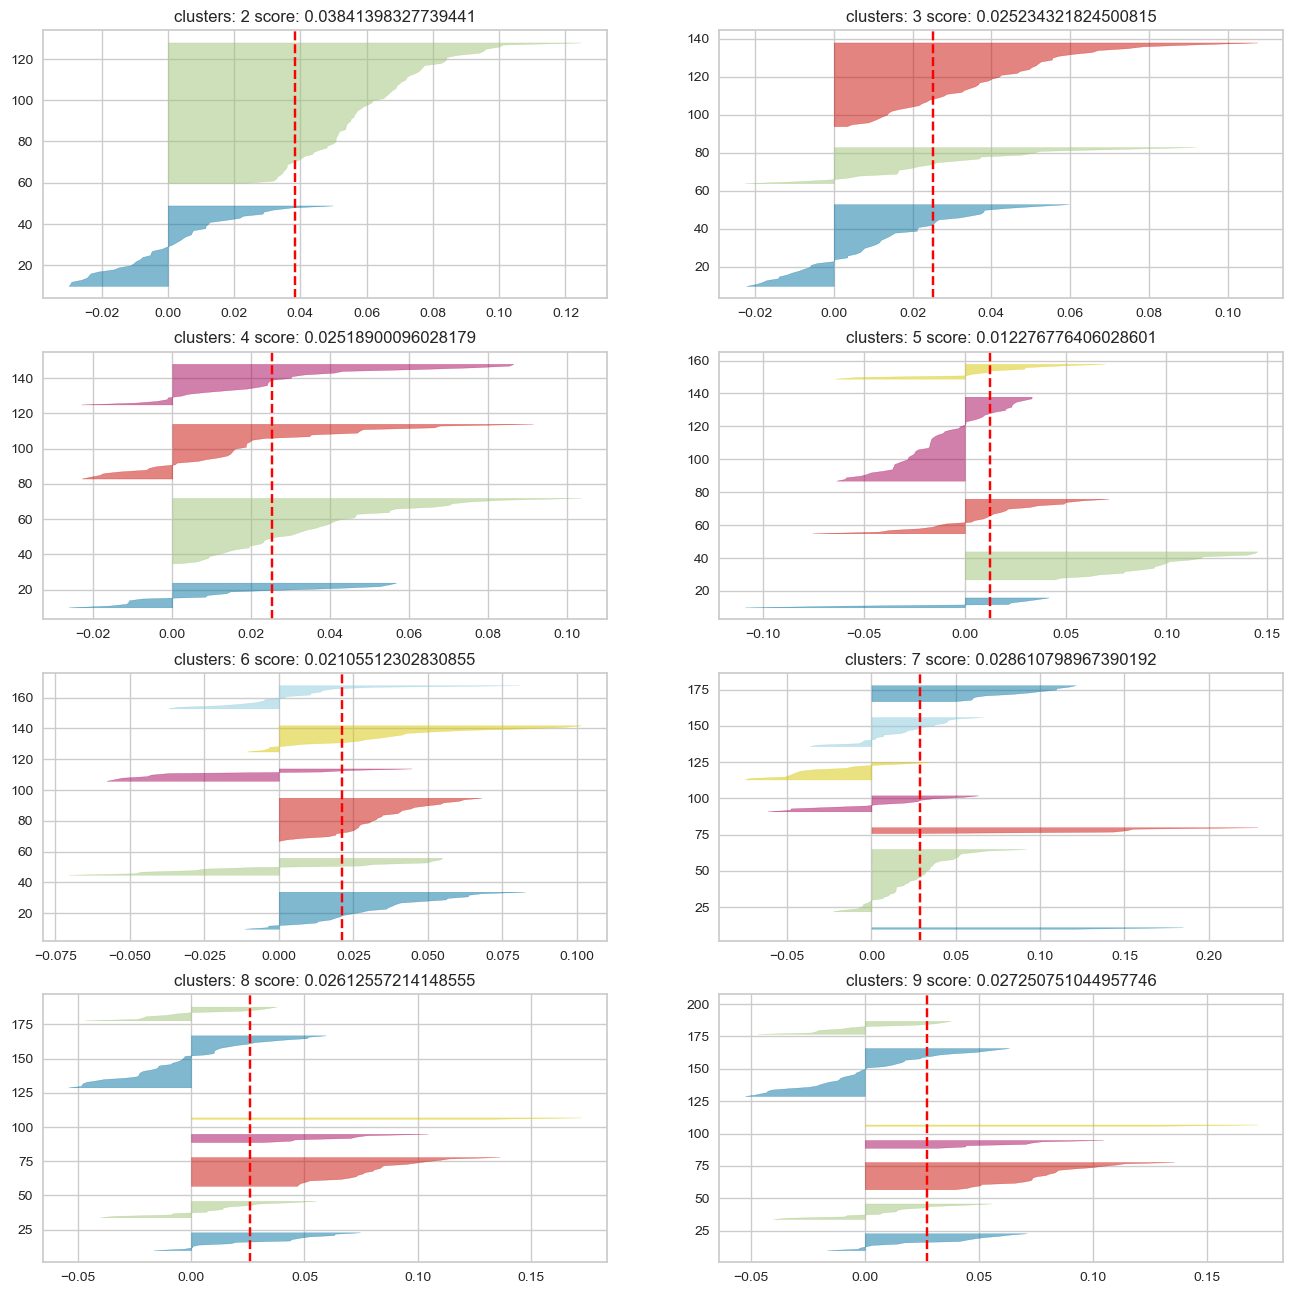

In [66]:
# best k_means with  silhouettee method 

plt.figure(figsize=(4 * 4,  2 * 8))

scores = {}
best_kmeans = None
best_score = -1
for n_clusters in range(2, 10):
    plt.subplot(4, 2, n_clusters - 1)
    kmeans = KMeans(n_clusters, random_state=42)
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
    visualizer.fit(data3_scaled)
    scores[n_clusters] = visualizer.silhouette_score_
    if visualizer.silhouette_score_ > best_score:
        best_score = visualizer.silhouette_score_
        best_kmeans = kmeans
    plt.title(f'clusters: {n_clusters} score: {visualizer.silhouette_score_}')


In [44]:
# Clusters Scores 
sorted(scores.items(), key=lambda kv: kv[1], reverse=True)

[(2, 0.03841398327739441),
 (7, 0.028610798967390192),
 (3, 0.025234321824500815),
 (4, 0.02518900096028179),
 (6, 0.02105512302830855),
 (5, 0.012276776406028601)]

In [45]:
# elbow method - k = (1-15)
#kmeans = KMeans(random_state=42)
#visualizer = KElbowVisualizer(kmeans, k=(1,15))
#visualizer.fit(data3_scaled)
#visualizer.show()

In [46]:
# kmeans with 3 clusters 
kmeans3 = KMeans(3, random_state=42)

In [47]:
# fit kmeans with 3 clusters 
kmeans3.fit(data3_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

### PCA in order to visualize the clusters 

We will use PCA method in order to visualize the clusters. There is a difficulty to present clusters into the cartesian field, that is why the size of each observation has a different size by cluster in order to produce a depth into the graph. 

In [48]:
# pca - kmeans with 3 clusters 
pca3 = PCA(n_components=3)
X3a = pca3.fit_transform(data3_scaled)

<AxesSubplot:>

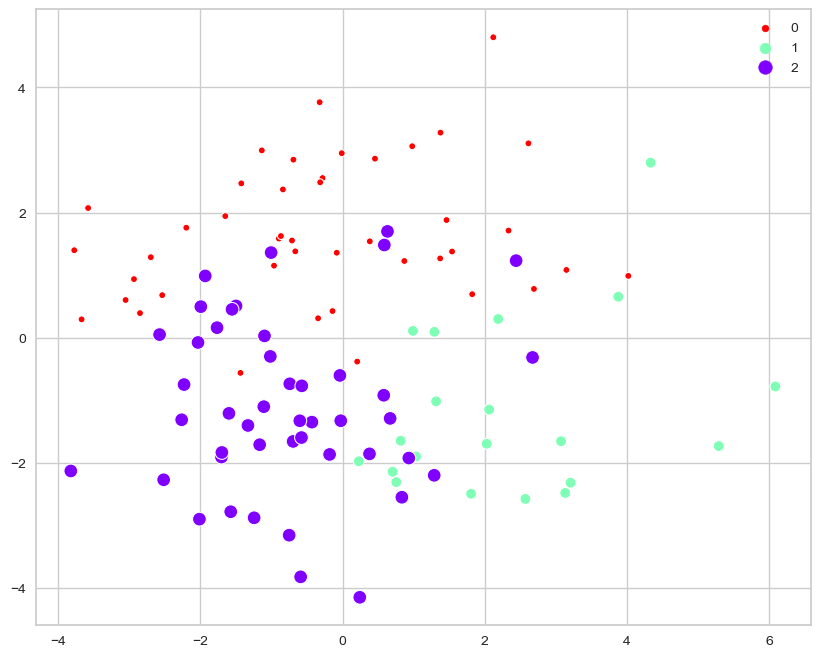

In [49]:
# plot - kmeans with 3 clusters # size (different size in order to visual better the clusters )

plt.figure(figsize=(10, 8))
sns.scatterplot(x=X3a[:, 0], y=X3a[:,1], hue=kmeans3.labels_ , palette="rainbow_r", size=kmeans3.labels_ )
# sns.scatterplot(data=tips, x="total_bill", y="tip", hue="size", palette="deep")

In [50]:
# Describe the groups, list the whiskeys in each group, and the best whiskey of each group, based on its score.
# You can also check how close your groups are to those found by the authors.

### Cluster Analysis
At this point, we will proceed into cluster analysis. We are going to assigne each whiskey observation into a cluster and try to produce some results. 

In [51]:
# Compute cluster centers and predict cluster index for each sample.
# from https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

clust_pred = kmeans3.fit_predict(data3_scaled)

In [52]:
clust_pred

array([2, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2,
       0, 1, 0, 2, 0, 2, 2, 1, 1, 0, 0, 2, 2, 0, 2, 0, 0, 2, 2, 2, 1, 2,
       2, 1, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 2, 1, 0, 0, 0, 0, 2,
       2, 1, 2, 0, 2, 0, 0, 0, 2, 2, 0, 1, 2, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       2, 1, 2, 0, 0, 2, 0, 1, 2, 1, 0, 1, 1, 2, 0, 2, 2, 2, 0, 2, 0])

In [55]:
# create dataset for describe 
# append clust_pred into the original  dataframe 

list1 = clust_pred.tolist()

df_clust=data.copy()
df_clust=df_clust.set_index('NAME')

df_clust["CLUSTERS_1"]=list1
df_clust.tail()

,WYNE,YELLOW,V.PALE,PALE,P.GOLD,GOLD,O.GOLD,F.GOLD,BRONZE,P.AMBER,...,ISLAY,MIDLAND,SPEY,EAST,WEST,NORTH,LOWLAND,CAMPBELL,ISLANDS,CLUSTERS_1
NAME,,,,,,,,,,,,,,,,,,,,,
Tobermory,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2
Tomatin,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2
Tomintoul,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
Tormore,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2
Tullibardine,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [56]:
final1 = df_clust[["SCORE","CLUSTERS_1"]]
final1

,SCORE,CLUSTERS_1
NAME,,
Aberfeldy,69.0,2
Aberlour,83.0,1
Ardberg,85.0,0
Ardmore,66.0,0
Auchentoshan,85.0,0
...,...,...
Tobermory,67.0,2
Tomatin,75.0,2
Tomintoul,76.0,0


### Top rated whiskeys 
The below table shows the top rated whiskeys of the dataset which are Cragganmore, Springbank-Longrow, Highland Park, Taliskerand, Lagavulin. Two of them are assigned into cluster 0 while the other are assigned into cluster 1. 

In [57]:
# sort the dataset SCORE
# Top rated whiskeys
final1.sort_values(by=['SCORE'], ascending = False).head()

,SCORE,CLUSTERS_1
NAME,,
Highland Park,90.0,1
Springbank-Longrow,90.0,0
Cragganmore,90.0,0
Talisker,90.0,1
Lagavulin,89.0,1


### Medium rated whiskeys 
The below table shows the top rated whiskeys of the dataset which are Aberlour, Ardberg, Auchentoshan, Aultmore, Balblair. <br>
Most of them are assigne into cluster 0.

In [58]:
# medium rated 
final1[(final1['SCORE'] >= 75) & (final1['SCORE'] <= 85)].head()

,SCORE,CLUSTERS_1
NAME,,
Aberlour,83.0,1
Ardberg,85.0,0
Auchentoshan,85.0,0
Aultmore,75.0,0
Balblair,76.0,0


### Lowest rated whiskeys 
From the below, we see that Glen Mhor, Glen Keith, North Port, Ben Nevis and Ladyburn are the worst five (5) whiskeys.<br>None of these whiskeys is assigned into cluster 3. 

In [59]:
# lowest rated
final1.sort_values(by=['SCORE'], ascending = True).head()

,SCORE,CLUSTERS_1
NAME,,
Ben Nevis,55.0,2
Ladyburn,57.0,0
Glen Keith,64.0,2
Glen Mhor,64.0,0
North Port,64.0,2


In [120]:
# all whiskeys of cluster0
final1[final1['CLUSTERS_1']== 0].sort_values(by="SCORE", ascending = False)

,SCORE,CLUSTERS_1
NAME,,
Springbank-Longrow,90.0,0
Cragganmore,90.0,0
Ardberg,85.0,0
Glenlivet,85.0,0
Auchentoshan,85.0,0
Glen Scotia,85.0,0
Bladnoch,85.0,0
Longmorn,85.0,0
Littlemill,83.0,0


In [121]:
# all whiskeys of cluster1
final1[final1['CLUSTERS_1']== 0].sort_values(by="SCORE", ascending = False)

,SCORE,CLUSTERS_1
NAME,,
Springbank-Longrow,90.0,0
Cragganmore,90.0,0
Ardberg,85.0,0
Glenlivet,85.0,0
Auchentoshan,85.0,0
Glen Scotia,85.0,0
Bladnoch,85.0,0
Longmorn,85.0,0
Littlemill,83.0,0


In [122]:
# all whiskeys of cluster1
final1[final1['CLUSTERS_1']== 1].sort_values(by="SCORE", ascending = False)

,SCORE,CLUSTERS_1
NAME,,
Talisker,90.0,1
Highland Park,90.0,1
Lagavulin,89.0,1
Springbank,88.0,1
Macallan,87.0,1
Glenfarclas,86.0,1
Dallas Dhu,85.0,1
Linkwood,83.0,1
Aberlour,83.0,1


### Describe the clusters Score distribution 
We group by the clusters in order to see how the SCORE is distributed in each cluster. <br> 
From the below table we see that cluster 1 has the best rated scores since its mean is 81.90 %. Regarding cluster 1 we see that it is also the cluster with the less values which most of them are above average. Regarding the the other two clusters the SCORE means and size are quite the same. Finally, every cluster has whiskeys with excellent scores.

In [60]:
# group by CLUSTER
BY_CLUSTER_1 = final1.groupby(['CLUSTERS_1'])

In [61]:
# describe SCORE 
summary1 = BY_CLUSTER_1.describe()
summary1

SCORE                                                     
           count       mean       std   min    25%   50%    75%   max
CLUSTERS_1                                                           
0           44.0  75.863636  6.828773  57.0  71.75  76.0  77.75  90.0
1           20.0  81.900000  5.349865  71.0  79.00  81.0  86.25  90.0
2           45.0  72.511111  5.715299  55.0  69.00  74.0  76.00  86.0

### Frequencies of observsations by cluster
Below we group by the clusters and take a look of how the observations are distributed into them. 

In [90]:
BY_CLUSTERS_1 = df_clust.groupby(by=["CLUSTERS_1"], as_index = True)
BY_CLUSTERS_1_sum = BY_CLUSTERS_1.sum()
BY_CLUSTERS_1_sum

,WYNE,YELLOW,V.PALE,PALE,P.GOLD,GOLD,O.GOLD,F.GOLD,BRONZE,P.AMBER,...,ISLAY,MIDLAND,SPEY,EAST,WEST,NORTH,LOWLAND,CAMPBELL,ISLANDS,CLUSTERS_2
CLUSTERS_1,,,,,,,,,,,,,,,,,,,,,
0,8.0,1.0,2.0,4.0,8.0,12.0,1.0,3.0,1.0,0.0,...,5.0,4.0,20.0,1.0,0.0,3.0,7.0,2.0,2.0,28
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,1.0,2.0,...,1.0,0.0,11.0,3.0,0.0,2.0,0.0,1.0,2.0,19
2,0.0,1.0,0.0,0.0,2.0,8.0,1.0,21.0,3.0,2.0,...,1.0,2.0,26.0,6.0,5.0,2.0,2.0,0.0,1.0,67


### Q4 Clustering with Geographical Information
The data set includes the geographical coordinates of the distilleries. Do a clustering of the distilleries on the geographical coordinates; then check if the clusters you found previously are related to the clusters you derived based on the geographical coordinates.

In [63]:
data4 = data2.copy()
data4.head(5)

,WYNE,YELLOW,V.PALE,PALE,P.GOLD,GOLD,O.GOLD,F.GOLD,BRONZE,P.AMBER,...,PERCENTAGE,ISLAY,MIDLAND,SPEY,EAST,WEST,NORTH,LOWLAND,CAMPBELL,ISLANDS
NAME,,,,,,,,,,,,,,,,,,,,,
Aberfeldy,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,40.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Aberlour,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,43.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Ardberg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,40.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ardmore,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,46.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Auchentoshan,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,40.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [64]:
# data normalization 
scaler4 = StandardScaler()
X4 = scaler.fit_transform(data4)
data4_scaled = pd.DataFrame(X4, index=data4.index, 
                             columns=data4.columns)

### Choose number of clusters 
We will perform Silhouette method again in order to choose the optimal number of clusters. I choose again three clusters since all clusters are above average score and the size of them is sufficient. We consider 3 clusters as a sub-optimal choice. 

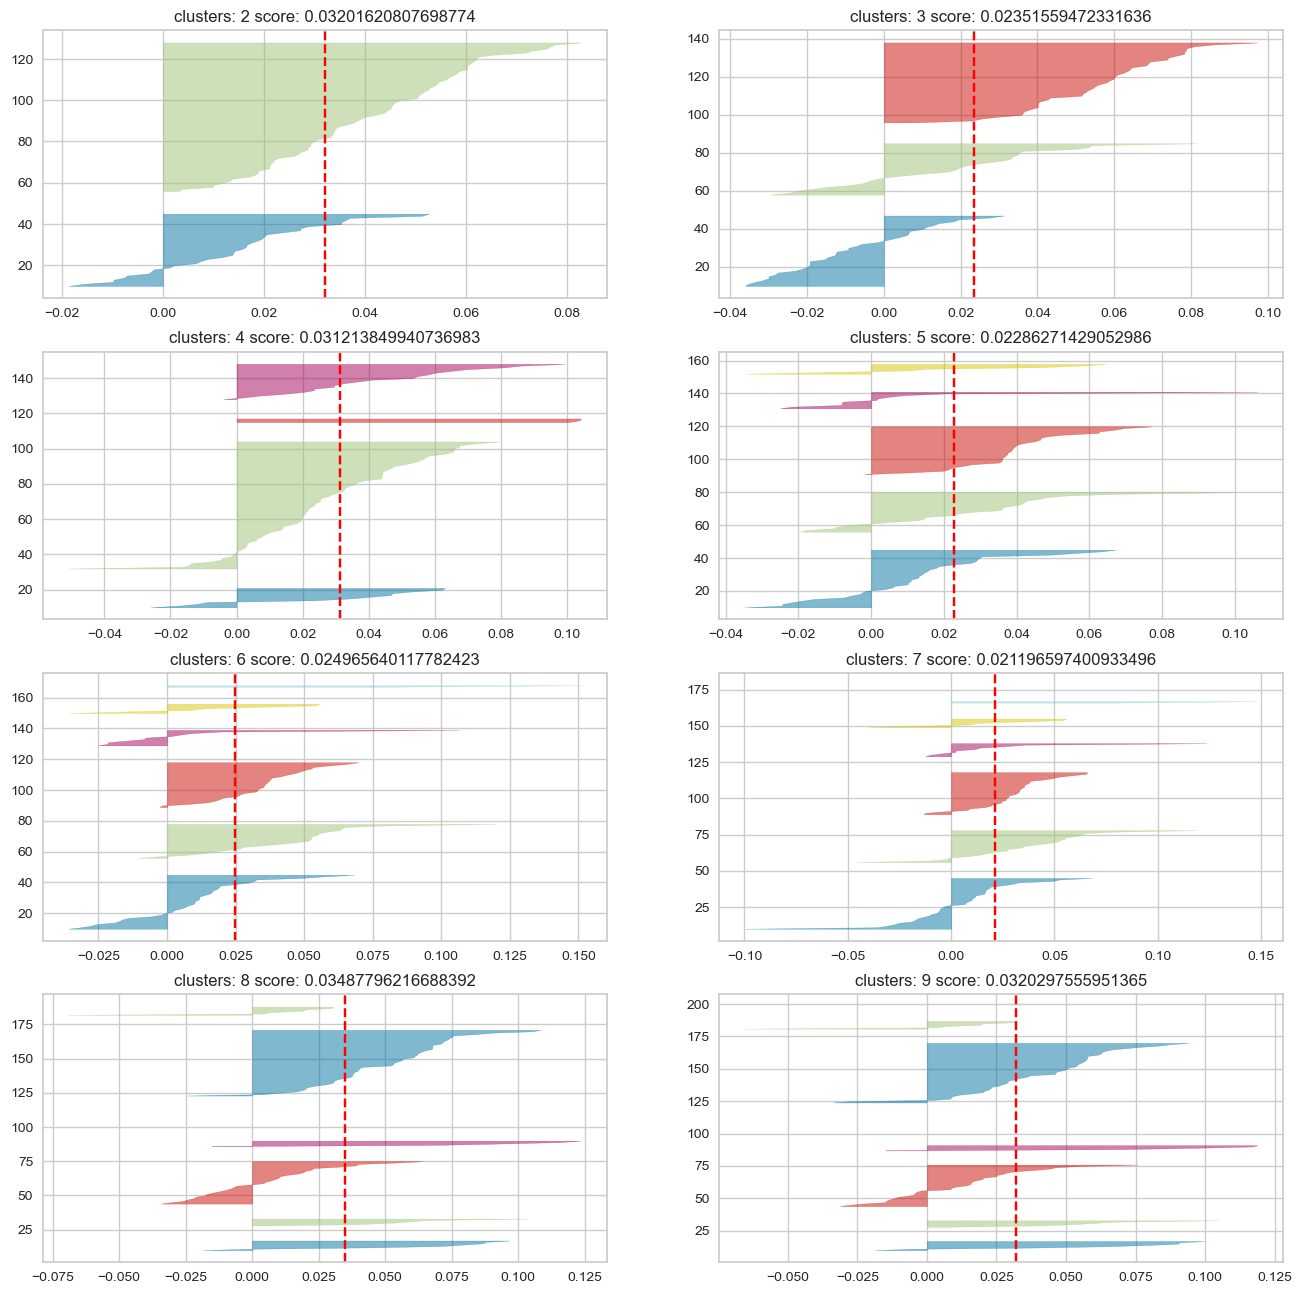

In [100]:
# best k_means with  silhouettee method 

plt.figure(figsize=(4 * 4,  2 * 8))

scores = {}
best_kmeans4 = None
best_score = -1
for n_clusters in range(2, 10):
    plt.subplot(4, 2, n_clusters - 1)
    kmeans = KMeans(n_clusters, random_state=42)
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
    visualizer.fit(data4_scaled)
    scores[n_clusters] = visualizer.silhouette_score_
    if visualizer.silhouette_score_ > best_score:
        best_score = visualizer.silhouette_score_
        best_kmeans4 = kmeans
    plt.title(f'clusters: {n_clusters} score: {visualizer.silhouette_score_}')

In [67]:
# elbow method 

#kmeans = KMeans(random_state=42)
#visualizer = KElbowVisualizer(kmeans, k=(1,16))

#visualizer.fit(data4_scaled)
#visualizer.show()

In [68]:
# fit kmeans with 3 clusters 

# fit kmeans with 3 clusters 
kmeans3.fit(data4_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [69]:
# pca - kmeans with 3 clusters 
X4b = pca3.fit_transform(data4_scaled)

### Clustering visualization 
Again we plot the clusters with the help of PCA method. Since we face difficulties to visualize them we use again size attribute in order to add some depth into the chart. 

<AxesSubplot:>

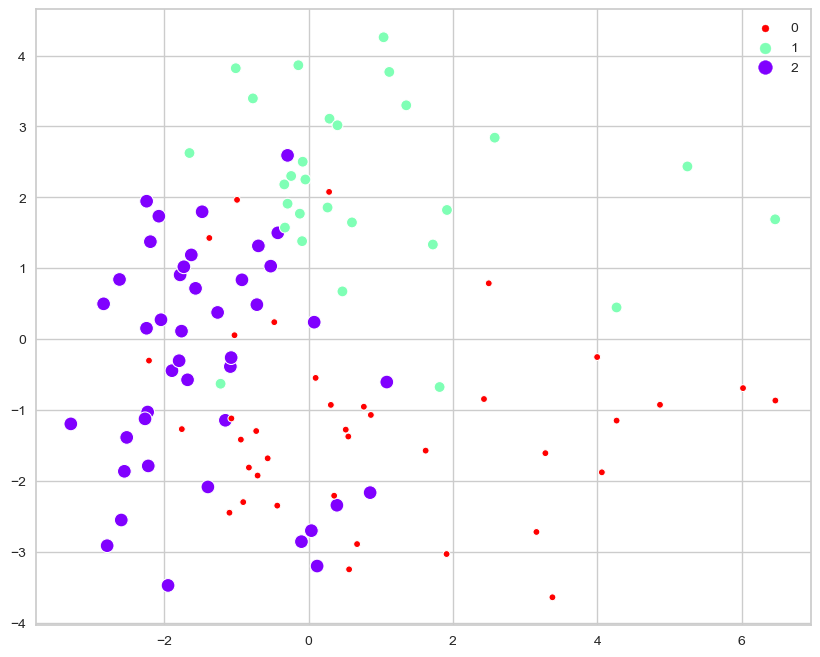

In [70]:
# plot - kmeans with 3 clusters 

plt.figure(figsize=(10, 8))
sns.scatterplot(x=X4b[:, 0], y=X4b[:,1], hue=kmeans3.labels_ , palette="rainbow_r", size=kmeans3.labels_ )
# sns.scatterplot(data=tips, x="total_bill", y="tip", hue="size", palette="deep")

In [71]:
# check if the clusters you found previously are related to the clusters you derived based on the geographical coordinates.

In [72]:
# Compute cluster centers and predict cluster index for each sample.
# apo https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

clust_pred2 = kmeans3.fit_predict(data4_scaled)

In [73]:
# append clust_pred into the dataframe 

list2 = clust_pred2.tolist()

df_clust["CLUSTERS_2"] = list2
df_clust.tail(3)

,WYNE,YELLOW,V.PALE,PALE,P.GOLD,GOLD,O.GOLD,F.GOLD,BRONZE,P.AMBER,...,MIDLAND,SPEY,EAST,WEST,NORTH,LOWLAND,CAMPBELL,ISLANDS,CLUSTERS_1,CLUSTERS_2
NAME,,,,,,,,,,,,,,,,,,,,,
Tomintoul,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
Tormore,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0
Tullibardine,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


In [74]:
# final dataset
final2 = df_clust[['SCORE','CLUSTERS_2']]

### Top rated whiskeys 
From the below table we see the best whiskeys based on clustering made included the geographical variables.

In [75]:
# sort the dataset  
final2.sort_values(by=['SCORE'], ascending = False).head()

,SCORE,CLUSTERS_2
NAME,,
Highland Park,90.0,1
Springbank-Longrow,90.0,0
Cragganmore,90.0,0
Talisker,90.0,1
Lagavulin,89.0,1


### Medium rated whiskeys 
The below table shows the medium rated whiskeys and their assigned cluster.

In [76]:
# medium rated 
final2[(final2['SCORE'] >= 75) & (final2['SCORE'] <= 85)].head()

,SCORE,CLUSTERS_2
NAME,,
Aberlour,83.0,1
Ardberg,85.0,0
Auchentoshan,85.0,0
Aultmore,75.0,0
Balblair,76.0,2


### Lowest rated whiskeys 
From the below, we see the worst(5) whiskeys. All of these whiskeys are assigned into cluster 2. Again no whiskey of cluster 3 is one from the worst ones. 

In [77]:
# lowest rated
final2.sort_values(by=['SCORE'], ascending = True).head()

,SCORE,CLUSTERS_2
NAME,,
Ben Nevis,55.0,2
Ladyburn,57.0,2
Glen Keith,64.0,2
Glen Mhor,64.0,2
North Port,64.0,2


In [119]:
# all whiskeys of cluster3
final2[final2['CLUSTERS_2']== 0].sort_values(by="SCORE", ascending = False)

,SCORE,CLUSTERS_2
NAME,,
Springbank-Longrow,90.0,0
Cragganmore,90.0,0
Springbank,88.0,0
Laphroaig,86.0,0
Ardberg,85.0,0
Glenlivet,85.0,0
Auchentoshan,85.0,0
Bladnoch,85.0,0
Longmorn,85.0,0


In [115]:
# all whiskeys of cluster1 
final2[final2['CLUSTERS_2']== 1].sort_values(by="SCORE", ascending = False)

,SCORE,CLUSTERS_2
NAME,,
Highland Park,90.0,1
Talisker,90.0,1
Lagavulin,89.0,1
Macallan,87.0,1
Glenfarclas,86.0,1
Balvenie,85.0,1
Dallas Dhu,85.0,1
Aberlour,83.0,1
Linkwood,83.0,1


In [116]:
# all whiskeys of cluster1 
final2[final2['CLUSTERS_2']== 2].sort_values(by="SCORE", ascending = False)

,SCORE,CLUSTERS_2
NAME,,
Edradour,81.0,2
Glen Garioch,77.0,2
Balblair,76.0,2
Glenury Royal,76.0,2
Glenlossie,76.0,2
Glen Grant,76.0,2
Bruichladdich,76.0,2
Tamdhu,75.0,2
Glenfiddich,75.0,2


### Describe the clusters Score distribution 
We group by the clusters in order to see how the SCORE is distributed in each cluster as previously. <br> 
From the below table we see that  the means of cluster 0 and 1 do not have much differnce. Regarding cluster 1 we see that it is also the cluster with the less observations.

In [78]:
BY_CLUSTER_2 = final2.groupby('CLUSTERS_2')

In [79]:
# describe 
summary2 = BY_CLUSTER_2.describe()
summary2

SCORE                                                    
           count       mean       std   min    25%   50%   75%   max
CLUSTERS_2                                                          
0           38.0  78.263158  6.012079  66.0  76.00  76.0  84.5  90.0
1           28.0  79.464286  6.100893  68.0  75.75  79.0  83.5  90.0
2           43.0  70.697674  5.230564  55.0  67.50  71.0  75.0  81.0

In [89]:
BY_CLUSTERS_2 = df_clust.groupby(by=["CLUSTERS_2"])
BY_CLUSTERS_2_sum = BY_CLUSTERS_2.sum()

### Summary tables

In [97]:
summary1

SCORE                                                     
           count       mean       std   min    25%   50%    75%   max
CLUSTERS_1                                                           
0           44.0  75.863636  6.828773  57.0  71.75  76.0  77.75  90.0
1           20.0  81.900000  5.349865  71.0  79.00  81.0  86.25  90.0
2           45.0  72.511111  5.715299  55.0  69.00  74.0  76.00  86.0

In [99]:
summary2

SCORE                                                    
           count       mean       std   min    25%   50%   75%   max
CLUSTERS_2                                                          
0           38.0  78.263158  6.012079  66.0  76.00  76.0  84.5  90.0
1           28.0  79.464286  6.100893  68.0  75.75  79.0  83.5  90.0
2           43.0  70.697674  5.230564  55.0  67.50  71.0  75.0  81.0

In [95]:
BY_CLUSTERS_1_sum

,WYNE,YELLOW,V.PALE,PALE,P.GOLD,GOLD,O.GOLD,F.GOLD,BRONZE,P.AMBER,...,ISLAY,MIDLAND,SPEY,EAST,WEST,NORTH,LOWLAND,CAMPBELL,ISLANDS,CLUSTERS_2
CLUSTERS_1,,,,,,,,,,,,,,,,,,,,,
0,8.0,1.0,2.0,4.0,8.0,12.0,1.0,3.0,1.0,0.0,...,5.0,4.0,20.0,1.0,0.0,3.0,7.0,2.0,2.0,28
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,1.0,2.0,...,1.0,0.0,11.0,3.0,0.0,2.0,0.0,1.0,2.0,19
2,0.0,1.0,0.0,0.0,2.0,8.0,1.0,21.0,3.0,2.0,...,1.0,2.0,26.0,6.0,5.0,2.0,2.0,0.0,1.0,67


In [96]:
BY_CLUSTERS_2_sum

,WYNE,YELLOW,V.PALE,PALE,P.GOLD,GOLD,O.GOLD,F.GOLD,BRONZE,P.AMBER,...,ISLAY,MIDLAND,SPEY,EAST,WEST,NORTH,LOWLAND,CAMPBELL,ISLANDS,CLUSTERS_1
CLUSTERS_2,,,,,,,,,,,,,,,,,,,,,
0,4.0,1.0,2.0,0.0,7.0,10.0,2.0,5.0,1.0,0.0,...,5.0,2.0,17.0,0.0,0.0,2.0,8.0,3.0,1.0,15
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,7.0,1.0,2.0,...,1.0,1.0,16.0,4.0,1.0,3.0,0.0,0.0,2.0,37
2,4.0,0.0,0.0,4.0,3.0,10.0,0.0,15.0,3.0,2.0,...,1.0,3.0,24.0,6.0,4.0,2.0,1.0,0.0,2.0,58
